You are given a categorical dataset – “Heart_Disease.csv.” Load the dataset into
a DataFrame. Considering the “TenYearCHD” column as the target variable,
perform the following tasks:
1. Explore the “Heart_Disease.csv” dataset, identify the null values and fill them
with the mean value of their respective columns
2. Split the data into test and train parts using train_test_split()
function in 80:20 ratio (80% train, 20% test)
3. Perform scaling of numeric data using the StandardScaler() function
4. Build a Logistic regression model using the test dataset and test the model
using the test dataset
5. Print the classification report of the model
6. Calculate the confusion matrix and plot the same using a heatmap
7. Calculate and print the accuracy score of the model
8. Print the decision boundary for θ = 0, θ = 1 and 2

# Import Librarys

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn import metrics
import sys


# Load dataset

In [ ]:
a=pd.read_csv('Heart_Disease.csv')
a.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


# Data Analysis

In [ ]:
a.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
a.isna().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [ ]:
b=a.fillna(a.mean())
b

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,3.0,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,2.0,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


In [ ]:
b.isna().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [ ]:
b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4238 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4238 non-null   float64
 5   BPMeds           4238 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4238 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4238 non-null   float64
 13  heartRate        4238 non-null   float64
 14  glucose          4238 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
b.nunique()/b.shape[0]

male               0.000472
age                0.009202
education          0.001180
currentSmoker      0.000472
cigsPerDay         0.008023
BPMeds             0.000708
prevalentStroke    0.000472
prevalentHyp       0.000472
diabetes           0.000472
totChol            0.058754
sysBP              0.055215
diaBP              0.034450
BMI                0.321850
heartRate          0.017461
glucose            0.033978
TenYearCHD         0.000472
dtype: float64

# Split the datas

In [ ]:
X=b.drop('TenYearCHD',axis=1)
Y=b['TenYearCHD']
print('Columns of x',X.columns)
print('Y',Y)
print('Shape of x',X.shape)
print('shape of y',Y.shape)

Columns of x Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose'],
      dtype='object')
Y 0       0
1       0
2       0
3       1
4       0
       ..
4233    1
4234    0
4235    0
4236    0
4237    0
Name: TenYearCHD, Length: 4238, dtype: int64
Shape of x (4238, 15)
shape of y (4238,)


# Split the data into test and train parts using train_test_split() function in 80:20 ratio (80% train, 20% test)

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.20,random_state=0)
print('After spliting the data-')
print('size  of input train data:',sys.getsizeof(X_train))
print('size  of input test data:',sys.getsizeof(X_test))
print('size  of output train data:',sys.getsizeof(Y_train))
print('size  of output test data:',sys.getsizeof(Y_test))

After spliting the data-
size  of input train data: 433952
size  of input test data: 108576
size  of output train data: 54272
size  of output test data: 13600


In [ ]:
#scaling the data
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)
X_train=pd.DataFrame(X_train,columns=X.columns)
X_test=pd.DataFrame(X_test,columns=X.columns)

In [ ]:

#training the model using LOgistic Regression
model=LogisticRegression()
model.fit(X_train,Y_train)


LogisticRegression()

# Print the classification report of the model

In [ ]:
Y_pred=model.predict(X_test)

In [ ]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.85      1.00      0.92       710
           1       0.82      0.07      0.12       138

    accuracy                           0.85       848
   macro avg       0.83      0.53      0.52       848
weighted avg       0.84      0.85      0.79       848



# Calculate the confusion matrix and plot the same using a heatmap

confusion_n=matrix is 
 [[708   2]
 [129   9]]


Text(42.0, 0.5, 'prdicted lable')

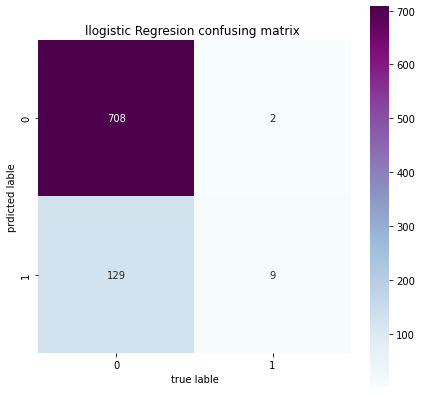

In [ ]:
conf_mat=confusion_matrix(Y_test,Y_pred)
print('confusion_n=matrix is \n',conf_mat)


# plotting confusion matrix
plt.figure(figsize=(7,7))
plt.title('llogistic Regresion confusing matrix ')
sns.heatmap(conf_mat,square=True,cmap='BuPu',annot=True,fmt='d')
plt.xlabel('true lable')
plt.ylabel('prdicted lable')

# alculate and print the accuracy score of the model

In [ ]:
print('accuracy score :',accuracy_score(Y_test,Y_pred))
print('accuracy:',round(100*accuracy_score(Y_test,Y_pred)),'%')

accuracy score : 0.8455188679245284
accuracy: 85 %


Print the decision boundary for θ = 0, θ = 1 and 2


In [ ]:
print(model.intercept_)
print(model.coef_)

[-1.99450414]
[[ 0.21635451  0.52284324 -0.00373038  0.01763908  0.27002551  0.01692892
   0.08452846  0.16742972  0.054612    0.0912552   0.29073846 -0.09032936
   0.03575889 -0.01982821  0.12616453]]
